## <center>Analyse Statistique et Visualisation de Données pour la Compréhension  Approfondie d'un Ensemble de Données Multidimensionnelles en Python <i><u>"Cancer Data"</u></i></center>

Réalisé par
* **Abir Lassoued** 
* **Eya Bendoudou** 
* **Hamdi Belanez** 
* **Wafa Jebali**

**Objectif**: Ce projet exploite des techniques avancées d'analyse statistique et de visualisation pour explorer les caractéristiques du cancer du sein à partir d'un ensemble de données multidimensionnelles. Nous avons développé un modèle de prédiction basé sur la régression logistique et utilisé des visualisations avancées pour identifier des tendances et des facteurs de risque associés. L'objectif principal est de contribuer à la prévention et à l'amélioration des interventions cliniques pour le cancer du sein.

les variables analysées principalement:
* **diagnosis** : Il s'agit d'une caractéristique qui enregistre le diagnostic du patient, spécifiquement s'il s'agit d'une tumeur bénigne (B) ou maligne (M).
* **texture_mean** : Cette variable représente la mesure de la variation locale des niveaux de gris dans une image médicale numérisée du tissu mammaire
* **radius_mean** :Cette caractéristique correspond à la moyenne des distances du centre à un point sur la périphérie d'une masse tumorale identifiée dans l'image médicale

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas.plotting as pd_plotting
import scipy.stats as stats
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix,plot_confusion_matrix
%matplotlib inline

## Prétraitement
##### Chargement du jeu de données.

In [79]:
df = pd.read_csv('Cancer_Data.csv') 

##### Dimensions du DataFrame :
Affiche le nombre de lignes et de colonnes dans le DataFrame.

In [80]:
df.shape

(569, 33)

##### Informations sur le DataFrame :
Afficher les informations sur les types de données et les valeurs manquantes dans le DataFrame.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### Types de données de chaque colonne :
Afficher les types de données de chaque colonne du DataFrame.

In [82]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

##### Vérification des valeurs manquantes :
Compter le nombre de valeurs manquantes pour chaque colonne du DataFrame.

In [83]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

##### Affichage des premières lignes du DataFrame :

In [84]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##### Suppression des colonnes inutiles
Sppression des colonnes 'id' et 'Unamed:32':

Irrelevance (Pertinence) : La colonne 'id' pourrait ne pas contenir d'informations pertinentes pour l'analyse effectuée, car elle représente souvent un identifiant unique pour chaque ligne, ce qui est inutile pour une analyse descriptive.

Colonne vide ou presque vide : La colonne 'Unnamed: 32' a 0 entrées non nulles, ce qui indique qu'elle pourrait être entièrement vide ou contenir des données insignifiantes. Ainsi, la supprimer n'affecte pas l'analyse et contribue à nettoyer le DataFrame.

In [85]:
df.drop(['id' , 'Unnamed: 32'], axis=1, inplace=True)

##### Identification des lignes en double :
Identifier le nombre de lignes dupliquées dans le DataFrame.

In [86]:
df.duplicated().sum()

0

##### Statistiques descriptives - toutes les colonnes :
Produire des statistiques descriptives pour toutes les colonnes, y compris les variables catégoriques.

In [87]:
df.describe(include="all")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


##### Identification des variables catégoriques :

In [88]:
categorical = (df.dtypes == "object")
categorical = list(categorical[categorical].index)
print(f'Les variables catégoriques : {categorical}')

Les variables catégoriques : ['diagnosis']


##### Identification des variables numriques :

In [89]:
numerical_float64 = (df.dtypes == "float64")
numerical = list(numerical_float64[numerical_float64].index)
print(f'Les variables catégoriques : {numerical}')

Les variables catégoriques : ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


## Analyse descriptive Univarié

### Qualitative
Visualiser les dix dernières entrées de la colonne "diagnosis" du DataFrame df. Cela offre un aperçu rapide des valeurs finales de cette colonne.

In [90]:
df["diagnosis"].tail(10)

559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, dtype: object

Fournir des statistiques descriptives telles que la moyenne, l'écart-type et les quartiles pour la colonne "diagnosis".

In [91]:
df["diagnosis"].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

Identifier les valeurs uniques présentes dans la colonne "diagnosis".

In [92]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

Créer une table croisée montrant la fréquence des valeurs uniques de "diagnosis".

In [93]:
t1=pd.crosstab(df["diagnosis"], "freq")
t1

col_0,freq
diagnosis,
B,357
M,212


Créer une table croisée normaliséede la fréquence des valeurs uniques de "diagnosis".

In [94]:
t2=pd.crosstab(df["diagnosis"], "freq", normalize =True)
t2

col_0,freq
diagnosis,
B,0.627417
M,0.372583


##### Test du chi carré
Effectuer un test du chi carré sur la table croisée pour évaluer si les valeurs de "diagnosis" diffèrent significativement des attentes théoriques. 

In [95]:
stats.chisquare(t1)

Power_divergenceResult(statistic=array([36.95079086]), pvalue=array([1.21148544e-09]))

##### Diagramme en barres
Créer un graphique à barres pour visualiser les fréquences des valeurs uniques de "diagnosis".

<Axes: xlabel='diagnosis', ylabel='count'>

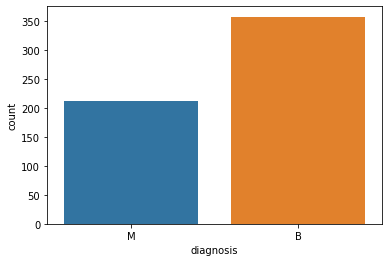

In [96]:
#en utilisant Seaborn
sns.countplot(x = "diagnosis", data = df)

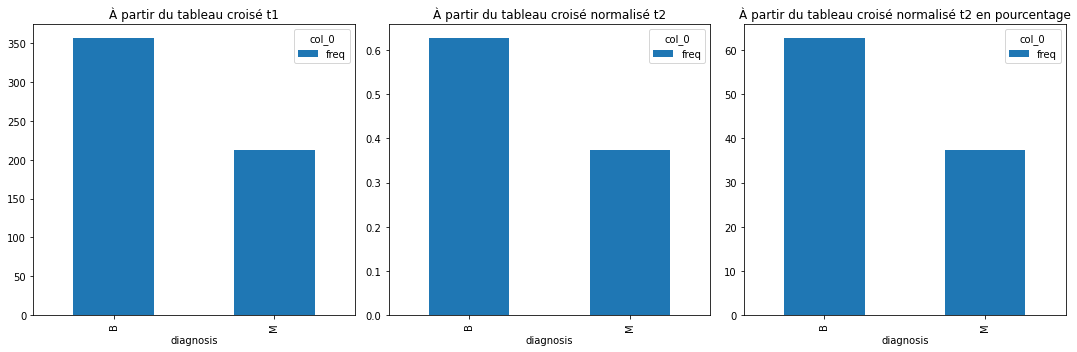

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Création d'une figure et des sous-graphiques

# Premier sous-graphique : à partir du tableau croisé t1
t1.plot.bar(ax=axes[0])
axes[0].set_title('À partir du tableau croisé t1')

# Deuxième sous-graphique : à partir du tableau croisé normalisé t2
t2.plot.bar(ax=axes[1])
axes[1].set_title('À partir du tableau croisé normalisé t2')

# Troisième sous-graphique : à partir du tableau croisé normalisé t2 en pourcentage
(t2 * 100).plot.bar(ax=axes[2])
axes[2].set_title('À partir du tableau croisé normalisé t2 en pourcentage')

plt.tight_layout()  # Ajustement automatique des sous-graphiques pour éviter les chevauchements
plt.show()  # Affichage de la figure


##### Diagramme circulaire
Génèrer un pie chart pour visualiser la répartition des valeurs de "diagnosis".

array([<Axes: ylabel='freq'>], dtype=object)

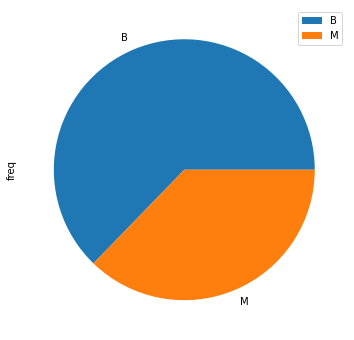

In [98]:
t1.plot.pie(subplots=True, figsize = (6, 6))

### Quantitative
Afficher un résumé statistique des données contenues dans la colonne "radius_mean" du DataFrame, notamment des mesures de tendance centrale, de dispersion et des quartiles.

In [99]:
df["radius_mean"].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

##### Évaluation de la normalité des variables numériques
Pour vérifier la normalité de nos données numériques, nous avons utilisé le test de Shapiro-Wilk pour vérifier si l'échantillon "radius_mean" est issu d'une distribution normale. Le résultat inclut une statistique de test et une p-value.

In [100]:
stats.shapiro(df.radius_mean)

ShapiroResult(statistic=0.9410696029663086, pvalue=3.1061551985026026e-14)

##### Histogramme de la variable "radius_mean"
Cette série de commandes génère un histogramme affichant la distribution des valeurs de "radius_mean" avec 20 bacs.

(array([ 4., 15., 31., 48., 93., 92., 71., 58., 32., 23., 22., 28., 27.,
        11.,  2.,  5.,  2.,  2.,  0.,  3.]),
 array([ 6.981  ,  8.03745,  9.0939 , 10.15035, 11.2068 , 12.26325,
        13.3197 , 14.37615, 15.4326 , 16.48905, 17.5455 , 18.60195,
        19.6584 , 20.71485, 21.7713 , 22.82775, 23.8842 , 24.94065,
        25.9971 , 27.05355, 28.11   ]),
 <BarContainer object of 20 artists>)

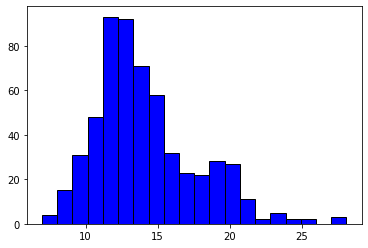

In [101]:
plt.hist(df['radius_mean'], bins=20, color='blue', edgecolor='black')

<Axes: >

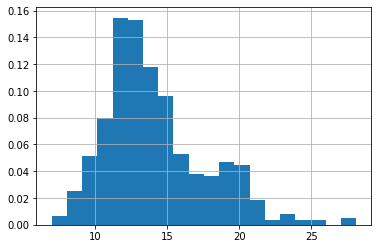

In [102]:
#créer l'histogramme avec Normalisation
df.radius_mean.hist(bins = 20, density = True)

##### Distribution et KDE (Kernel Density Estimate) de "radius_mean"
Génèrer une représentation visuelle de la distribution des données de la colonne "radius_mean" à l'aide d'un histogramme et d'une estimation de densité (KDE - Kernel Density Estimate). L'histogramme utilise des barres pour montrer la fréquence des valeurs, tandis que la courbe de densité offre une vue plus lisse et continue de la répartition des données.

<Axes: ylabel='Density'>

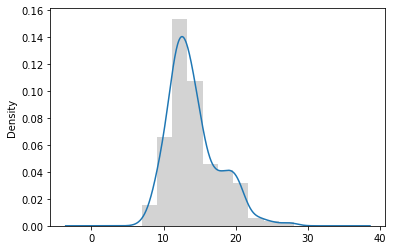

In [103]:
df.radius_mean.plot(kind = "hist", density = True, color = "lightgrey")
df.radius_mean.plot(kind = "kde")

##### Boîte à moustaches (boxplot) pour "radius_mean"
Produire une représentation graphique des mesures de dispersion de "radius_mean" à travers une boîte à moustaches, mettant en évidence les médianes, les quartiles et les plages interquartiles.

<Axes: >

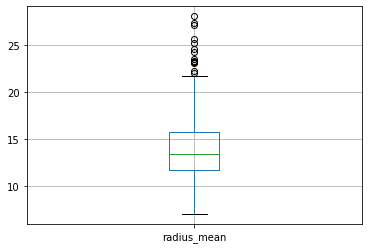

In [104]:
df.boxplot(column = "radius_mean")

## Analyse descriptive Bivarié

### Quantitative-Quantitative

<center><b><i>Hypothèses pour 'texture_mean' et 'radius_mean'</i></b></center>

<center>
    <b>H0 (hypothèse nulle)</b> :
Il n'existe aucune corrélation linéaire entre la taille d'un nodule mammaire (radius_mean) et son irrégularité de texture (texture_mean).


<b>H1 (hypothèse alternative)</b> :
Il existe une corrélation positive entre la taille d'un nodule mammaire (radius_mean) et son irrégularité de texture (texture_mean), suggérant que des nodules mammaires de plus grande taille ont tendance à présenter une texture plus irrégulière
</center>

##### Matrice de corrélation
Cette opération calcule la matrice de corrélation entre les variables numériques d'un DataFrame, représentant la force et la direction des relations linéaires entre ces variables, fournissant ainsi un aperçu des associations entre elles.

In [105]:
correlation_matrix = df[numerical].corr()
correlation_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Mesurer la corrélation entre "radius_mean" et "texture_mean"

In [106]:
df['radius_mean'].corr(df['texture_mean'])

0.3237818909277331

Mesurer la covariance entre "radius_mean" et "texture_mean"

In [107]:
df['radius_mean'].cov(df['texture_mean'])

4.907581563992921

##### Test de Pearsonr
Calculer le coefficient de corrélation de Pearson entre les variables "radius_mean" et "texture_mean". Ce coefficient mesure à quel point ces deux variables sont linéairement liées et fournit également une valeur p (p-value) pour évaluer la significativité de cette corrélation

In [108]:
from scipy.stats import pearsonr
pearsonr(df['radius_mean'], df['texture_mean'])

(0.323781890927733, 2.360374375922593e-15)

##### Test de Kendaulltau
Calculer le coefficient de corrélation de Kendall entre ces deux variables, mesurant la similarité des classements ou ordres entre les observations de ces variables.

In [109]:
#Calculer le coefficient de corrélation de Kendall entre les deux variables "radius_mean" et "texture_mean"
 #Solution
from scipy.stats import kendalltau
kendalltau(df['texture_mean'], df['radius_mean'])

KendalltauResult(correlation=0.22915937844564307, pvalue=3.1207494406194455e-16)

##### Nuage en points
Visualiser la relation entre les variables "texture_mean" et "radius_mean" à travers un nuage de points, offrant ainsi un aperçu visuel de leur corrélation ou relation potentielle.

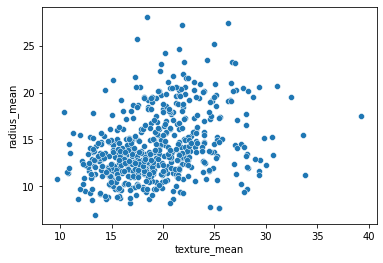

In [110]:
sns.scatterplot(x="texture_mean", y="radius_mean",data=df)
plt.xlabel('texture_mean')
plt.ylabel('radius_mean')
plt.show()

##### Matrice de dispersion
Sélectionner un sous-ensemble de colonnes pertinentes pour une matrice de dispersion plus approfondie.

In [111]:
# Sélection des colonnes pertinentes dans le dataset
selected_columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'
                    ,'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
                    #,'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']

# Création d'un nouveau dataframe avec les colonnes sélectionnées
selected_data = df[selected_columns]

# Affichage des premières lignes pour vérification
print(selected_data.head())


  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  
0          0.11840           0.27760          0.3001              0.14710  
1          0.08474           0.07864          0.0869              0.07017  
2          0.10960           0.15990          0.1974              0.12790  
3          0.14250           0.28390          0.2414              0.10520  
4          0.10030           0.13280          0.1980              0.10430  


génèrer une matrice de dispersion pour les colonnes sélectionnées, offrant une vue dense des relations entre les variables, utile pour identifier des schémas de corrélation ou des tendances potentielles entre les mesure.

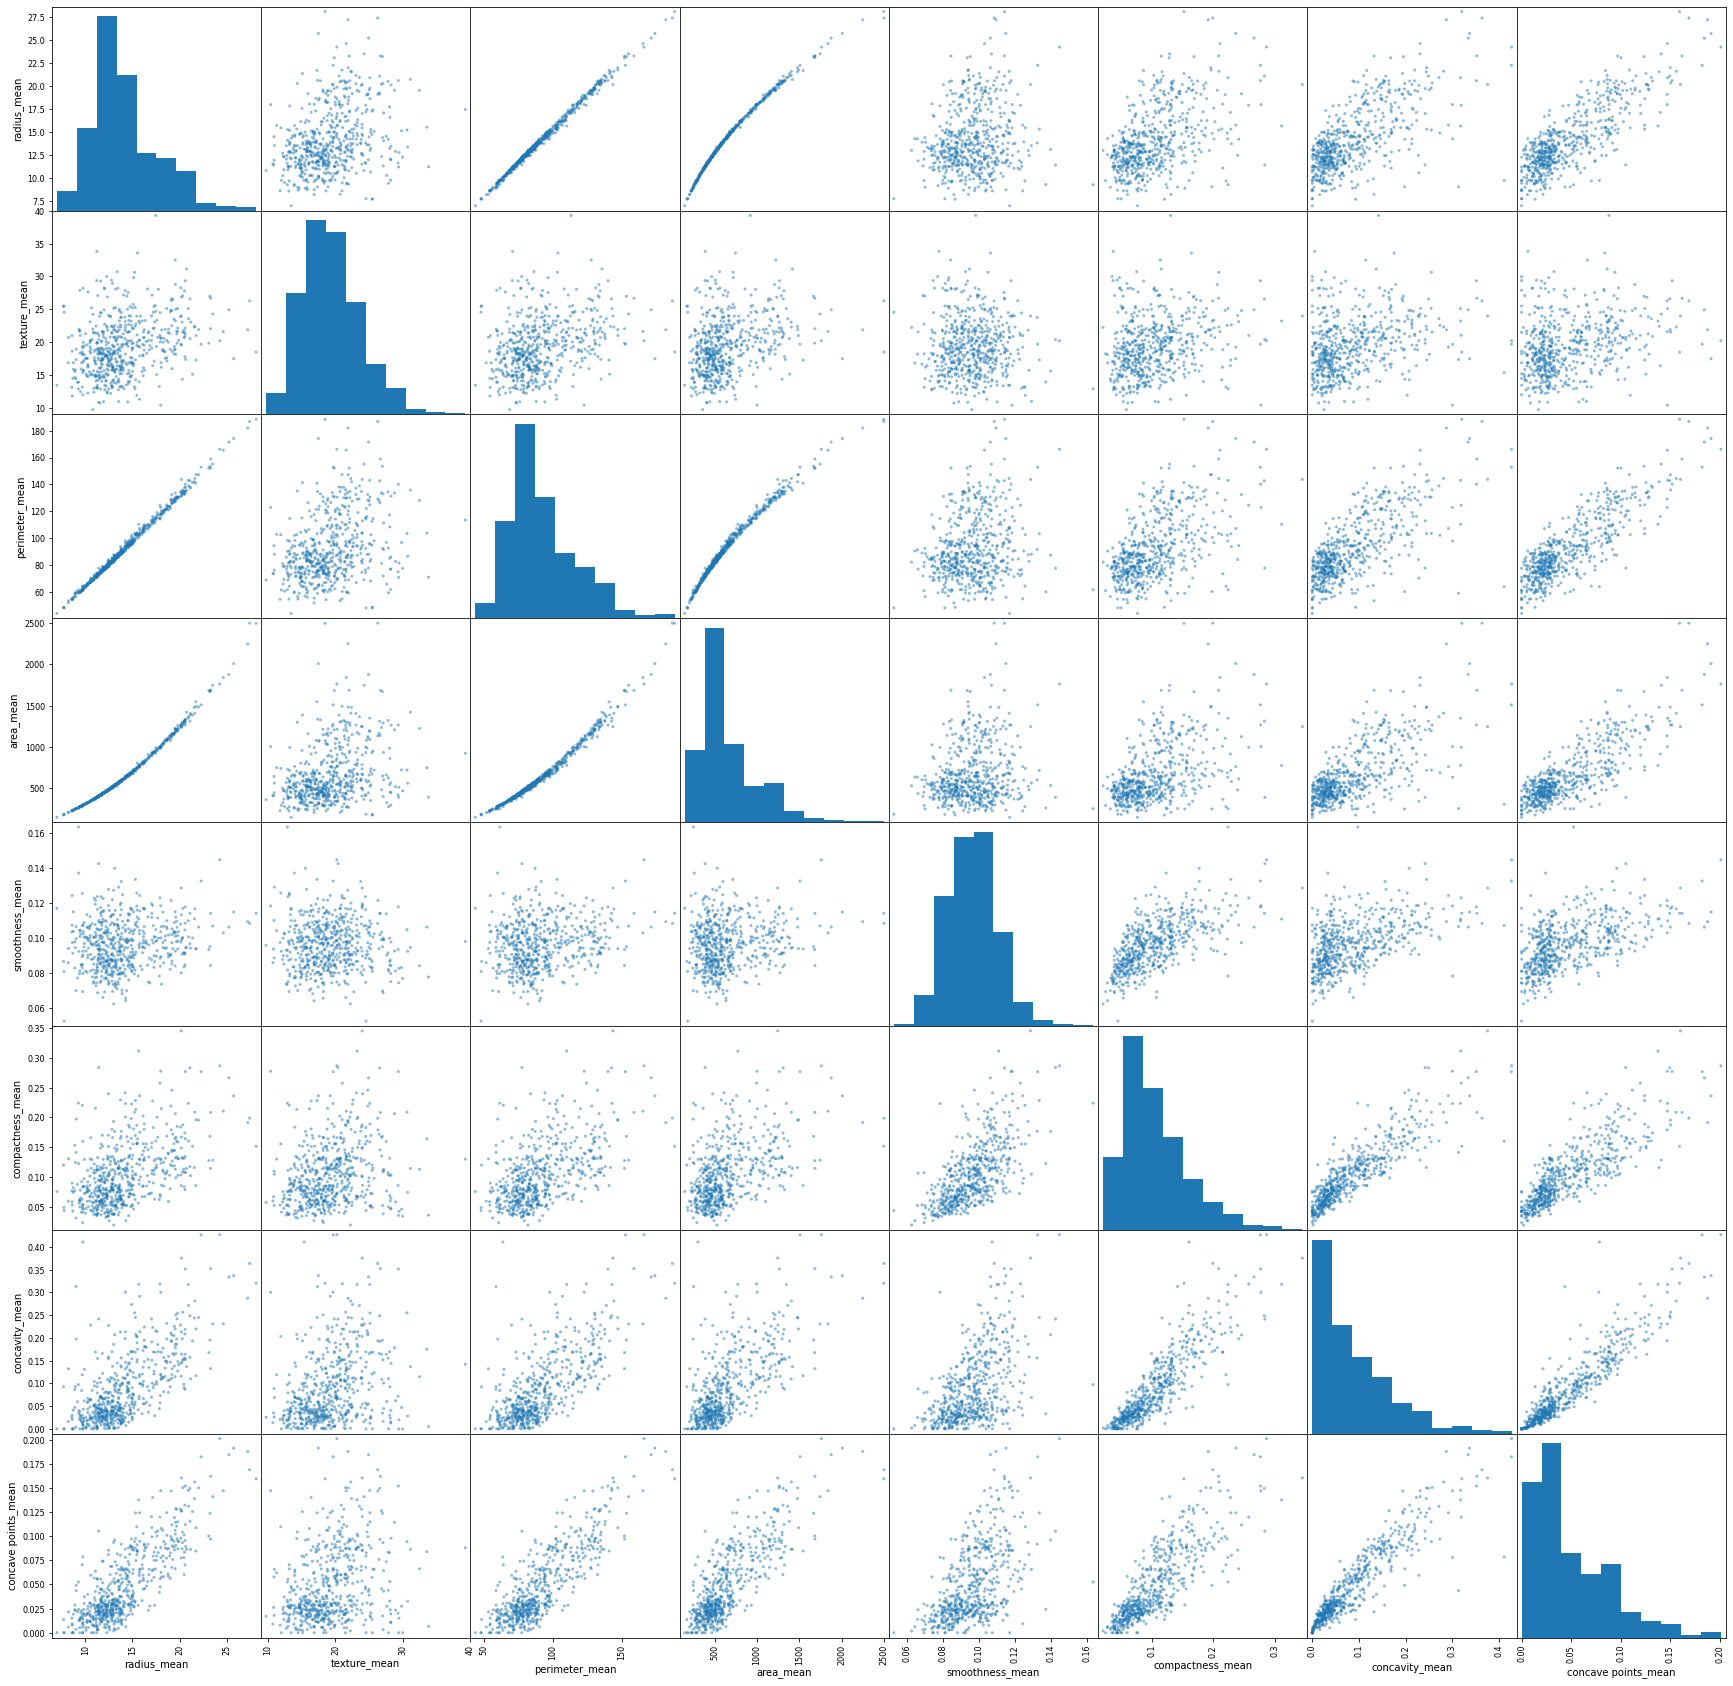

In [112]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[selected_columns], figsize=(30, 30))
plt.show()

### Qualitative-Quantitative

<center><b><i>Hypothèses pour 'texture_mean' et 'diagnosis'</i></b></center>

<center>
    <b>H0 (hypothèse nulle)</b> :
Les patients diagnostiqués avec un cancer du sein malin présentent une texture moyenne similaire à celle des patients diagnostiqués avec un cancer du sein bénin (aucune différence significative dans la texture moyenne).


<b>H1 (hypothèse alternative)</b> :
Les patients diagnostiqués avec un cancer du sein malin ont une texture moyenne significativement plus irrégulière que les patients diagnostiqués avec un cancer du sein bénin.
</center>

Comparer les moyennes des caractéristiques numériques entre les diagnostics médicaux ('diagnosis') dans le dataset, permettant ainsi d'observer les variations moyennes distinctes entre ces diagnostics

In [113]:
df[numerical].groupby(df['diagnosis']).mean() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Cette opération vise à comparer les mesures de la caractéristique "texture_mean" entre les diagnostics de tumeurs mammaires (malignes et bénignes). Elle calcule la moyenne, l'écart-type, la médiane, ainsi que les valeurs minimales et maximales de la texture moyenne pour chaque diagnostic ('M' pour maligne, 'B' pour bénigne) afin de déceler les variations distinctes de cette caractéristique entre les deux types de tumeurs.

In [114]:
df.groupby("diagnosis")["texture_mean"].agg([np.mean, np.std, np.median, np.min, np.max])

,mean,std,median,amin,amax
diagnosis,,,,,
B,17.914762,3.995125,17.39,9.71,33.81
M,21.604906,3.779470,21.46,10.38,39.28


##### Test de t student
Ce test t de Student vise à évaluer si les moyennes de la caractéristique 'texture_mean' diffèrent de manière significative entre les diagnostics de tumeurs malignes et bénignes. Il permet de déterminer si les variations observées dans cette caractéristique sont statistiquement significatives entre les deux types de tumeurs.

In [115]:
from scipy.stats import ttest_ind

# Sélection des données pour chaque diagnostic spécifique
data_malignant = df['texture_mean'][df['diagnosis'] == 'M']
data_benign = df['texture_mean'][df['diagnosis'] == 'B']

# Effectuer le test t pour les deux diagnostics
t_statistic, p_value = ttest_ind(data_malignant, data_benign)

# Afficher les résultats du test t
print(f"Statistique T pour tumeurs malignes vs bénignes : {t_statistic}")
print(f"Valeur p pour tumeurs malignes vs bénignes : {p_value}")


Statistique T pour tumeurs malignes vs bénignes : 10.86720108146434
Valeur p pour tumeurs malignes vs bénignes : 4.0586360478980736e-25


##### Test Anova
Le test ANOVA pour 'texture_mean' et 'diagnosis' vise à évaluer si les moyennes de l'irrégularité de texture ('texture_mean') varient de manière significative entre les diagnostics de tumeurs malignes et bénignes. Cette analyse statistique permet de déterminer si la différence observée dans la moyenne de la texture est statistiquement significative entre les groupes de diagnostics, contribuant ainsi à identifier une éventuelle association entre la texture des tumeurs mammaires et leur nature maligne ou bénigne.

In [116]:
from scipy.stats import f_oneway

# Sélection des données pour chaque diagnostic spécifique
data_malignant = df['texture_mean'][df['diagnosis'] == 'M']
data_benign = df['texture_mean'][df['diagnosis'] == 'B']

# Effectuer le test ANOVA
test_anova = f_oneway(data_malignant, data_benign)

# Afficher les résultats du test ANOVA
print("Test ANOVA pour 'texture_mean' et 'diagnosis':")
print(f"Statistique F : {test_anova.statistic}")
print(f"Valeur p : {test_anova.pvalue}")


Test ANOVA pour 'texture_mean' et 'diagnosis':
Statistique F : 118.09605934497965
Valeur p : 4.0586360478986136e-25


##### Histogrammes
visualisation de la distribution de l'irrégularité de texture ('texture_mean') pour les tumeurs malignes et bénignes séparément en des histogrammes séparés

array([<Axes: title={'center': 'B'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

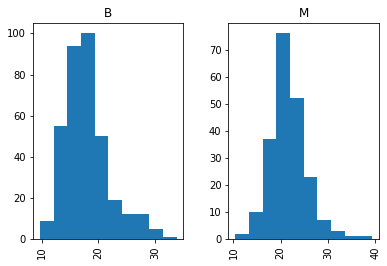

In [117]:
df.hist(column = "texture_mean", by = "diagnosis")

##### Boxplot/Boite à moustaches
Produire une grille de boîtes à moustaches pour chaque variable numérique du dataframe, réparties par catégorie de diagnostic, offrant une comparaison visuelle des distributions et des valeurs aberrantes potentielles entre les deux groupes de diagnostic.

array([[<Axes: title={'center': 'area_mean'}, xlabel='[diagnosis]'>,
        <Axes: title={'center': 'area_se'}, xlabel='[diagnosis]'>,
        <Axes: title={'center': 'area_worst'}, xlabel='[diagnosis]'>,
        <Axes: title={'center': 'compactness_mean'}, xlabel='[diagnosis]'>,
        <Axes: title={'center': 'compactness_se'}, xlabel='[diagnosis]'>,
        <Axes: title={'center': 'compactness_worst'}, xlabel='[diagnosis]'>],
       [<Axes: title={'center': 'concave points_mean'}, xlabel='[diagnosis]'>,
        <Axes: title={'center': 'concave points_se'}, xlabel='[diagnosis]'>,
        <Axes: title={'center': 'concave points_worst'}, xlabel='[diagnosis]'>,
        <Axes: title={'center': 'concavity_mean'}, xlabel='[diagnosis]'>,
        <Axes: title={'center': 'concavity_se'}, xlabel='[diagnosis]'>,
        <Axes: title={'center': 'concavity_worst'}, xlabel='[diagnosis]'>],
       [<Axes: title={'center': 'fractal_dimension_mean'}, xlabel='[diagnosis]'>,
        <Axes: title={'cen

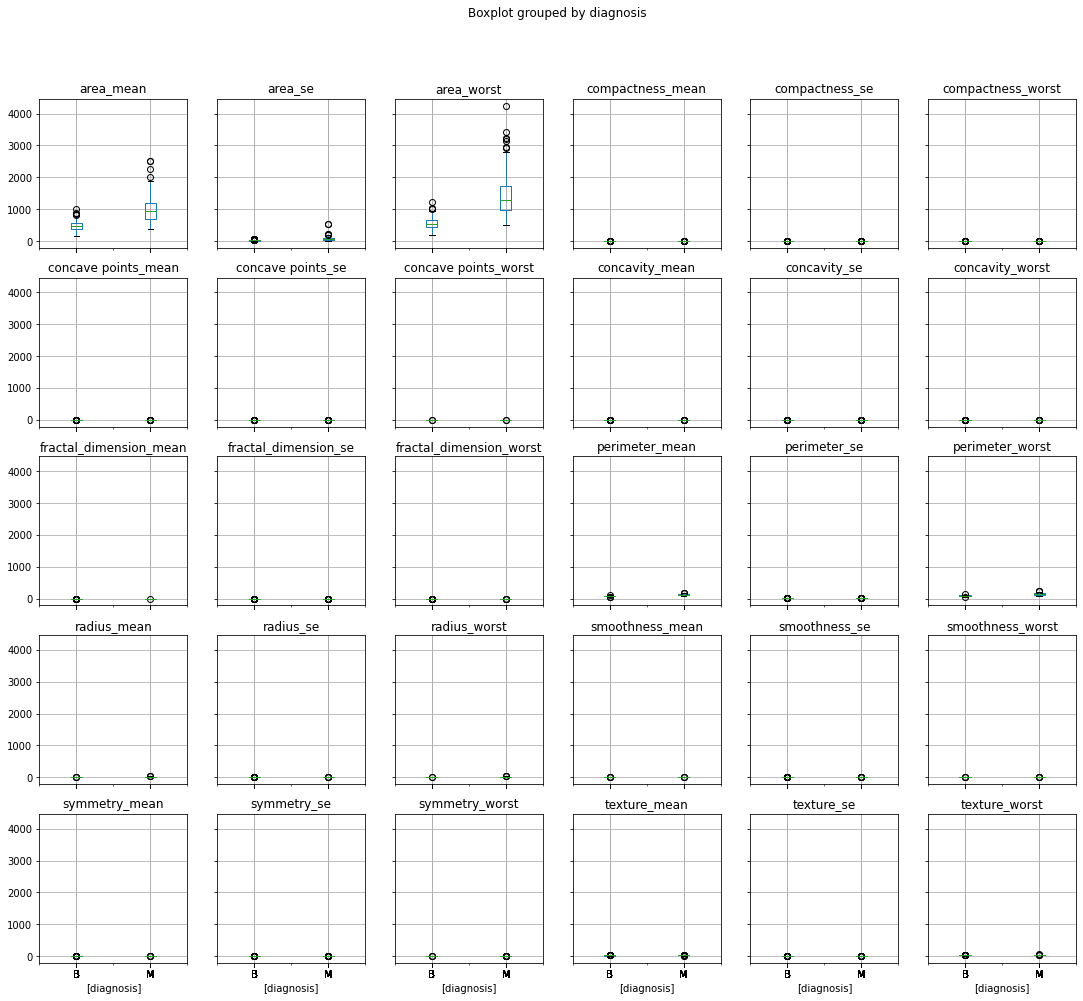

In [118]:
df.boxplot(by = "diagnosis",layout=(5, 6), figsize=(18, 16))

Génèrer des boîtes à moustaches pour la variable "texture_mean" en la répartissant par catégorie de diagnostic.

<Axes: title={'center': 'texture_mean'}, xlabel='diagnosis'>

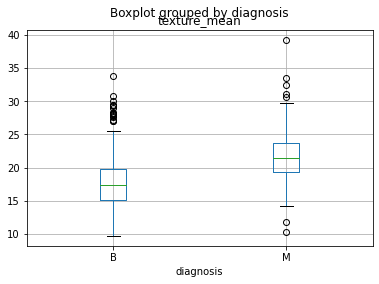

In [119]:
df.boxplot(column = "texture_mean", by = "diagnosis")


## Analyse descriptive Multivarié : ACP

L'analyse en composantes principales (PCA) est une technique de réduction de dimension qui permet de transformer un ensemble de données multidimensionnel en un ensemble de données uni ou multidimensionnel de moindre dimension tout en conservant l'essentiel de l'information.

La PCA fonctionne en projetant les données sur un nouvel ensemble de dimensions, appelé composantes principales. Ces composantes principales sont choisies de manière à maximiser la variance expliquée des données

##### Gestion des Valeurs Manquantes et Initialisation de la PCA
Supprimer les lignes comportant des valeurs manquantes dans le jeu de données puis initialiser l'analyse en composantes principales (PCA) pour préparer l'apprentissage des composantes à partir des données.

In [120]:
data_no_diagnosis= df.drop('diagnosis', axis=1)
# Gestion des valeurs manquantes si nécessaire
data_no_diagnosis.dropna(inplace=True)  # Suppression des lignes avec des valeurs manquantes
data_no_diagnosis = data_no_diagnosis.astype(float)  # Conversion des données en type flottant si nécessaire
# Initialisation de l'analyse en composantes principales (PCA)
pca = PCA()
# Apprentissage des composantes principales à partir des données sans la colonne de diagnostic
pca.fit(data_no_diagnosis)

PCA()

##### Analyse des Valeurs Propres
Après l'initialisation,on calcule et affiche les valeurs propres des composantes principales ainsi que le ratio de variance expliquée par chaque composante. Ces informations sont ensuite organisées dans un DataFrame pour une visualisation plus claire.

In [121]:
# Affichage des valeurs propres des composantes principales
print(pca.explained_variance_)
# Affichage du ratio de variance expliquée par chaque composante
print(pca.explained_variance_ratio_)

[4.43782605e+05 7.31010006e+03 7.03833742e+02 5.46487379e+01
 3.98900178e+01 3.00458768e+00 1.81533030e+00 3.71466740e-01
 1.55513547e-01 8.40612196e-02 3.16089533e-02 7.49736514e-03
 3.16165652e-03 2.16150395e-03 1.32653879e-03 6.40269304e-04
 3.74883320e-04 2.35169626e-04 1.84583467e-04 1.64180064e-04
 7.81102011e-05 5.76111660e-05 3.49172775e-05 2.83952689e-05
 1.61463677e-05 1.24902419e-05 3.68048171e-06 2.84790425e-06
 2.00491564e-06 7.01997261e-07]
[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]


In [122]:
# Création d'un DataFrame contenant les informations sur les composantes principales
eig = pd.DataFrame(
    {
        "Dimension": ["Dim" + str(x + 1) for x in range(30)],  # Numérotation des dimensions
        "Variance expliquée": pca.explained_variance_,  # Valeurs propres des composantes principales
        "% variance expliquée": np.round(pca.explained_variance_ratio_ * 100),  # Pourcentage de variance expliquée par chaque composante
        "% cum. var. expliquée": np.round(np.cumsum(pca.explained_variance_ratio_) * 100)  # Pourcentage cumulatif de variance expliquée
    }
)
# Affichage du DataFrame contenant les informations sur les composantes principales
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,4.437826e+05,98.0,98.0
1,Dim2,7.310100e+03,2.0,100.0
2,Dim3,7.038337e+02,0.0,100.0
3,Dim4,5.464874e+01,0.0,100.0
4,Dim5,3.989002e+01,0.0,100.0
5,Dim6,3.004588e+00,0.0,100.0
6,Dim7,1.815330e+00,0.0,100.0
7,Dim8,3.714667e-01,0.0,100.0
8,Dim9,1.555135e-01,0.0,100.0
9,Dim10,8.406122e-02,0.0,100.0


##### Variance Expliquée Cumulative
cette étape consiste à évaluer la contribution de chaque composante à la variance totale des données. Le graphique de la variance expliquée cumulative en fonction du nombre de composantes permet de déterminer le nombre optimal de composantes à retenir pour conserver une quantité significative de variance tout en réduisant la dimensionnalité des données. Cela aide à décider du seuil à appliquer dans la sélection des composantes principales.
En fait,cette méthode suit une approche similaire à la méthode du coude (Elbow Method) souvent utilisée pour déterminer le nombre optimal de clusters dans les analyses de regroupement (clustering)

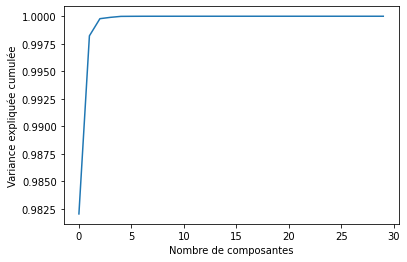

In [123]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.show()

##### Diagramme en Barres
La représentation visuelle du pourcentage de variance expliquée par chaque composante est générée sous forme d'un diagramme en barres, permettant de visualiser l'importance relative de chaque composante dans la capture de la variance des données. Cette visualisation est cruciale pour comprendre quelle proportion de l'information originale est conservée à travers chaque dimension.
L'ajout d'une ligne de seuil marque un point spécifique. Ce seuil est choisi pour représenter un niveau de variance expliquée que l'on considère comme suffisant pour notre application

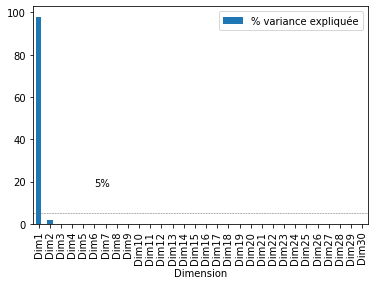

In [124]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "5%") # ajout de texte
plt.axhline(y = 5, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

##### Transformation et Visualisation des Données
Après avoir obtenu les composantes principales,on transforme les données d'origine en utilisant ces composantes pour créer un nouveau DataFrame et on visualise également les premières lignes de ce DataFrame pour une inspection rapide.

In [125]:
# calculer les coordonnées des données sur les dimensions, avec la fonction transform() de l'objet pca.
data_pca = pca.transform(data_no_diagnosis)
# Transformation en DataFrame pandas
data_pca_df = pd.DataFrame({
    "Dim1" : data_pca[:,0], 
    "Dim2" : data_pca[:,1],
    
    "diagnosis" : df["diagnosis"],
})

# Résultat (premières lignes)
data_pca_df.head()

,Dim1,Dim2,diagnosis
0,1160.142574,-293.917544,M
1,1269.122443,15.630182,M
2,995.793889,39.156743,M
3,-407.180803,-67.380320,M
4,930.341180,189.340742,M


##### Nuage de Points (Premier Plan Factoriel)
Pour mieux comprendre la structure des données, un nuage de points est créé, mettant en évidence les deux premières dimensions des données transformées par PCA .

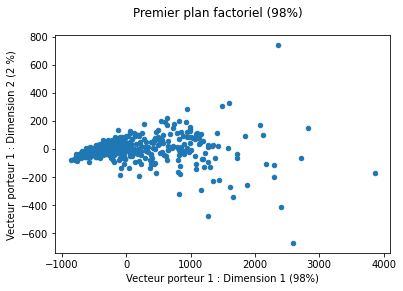

In [128]:
data_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Vecteur porteur 1 : Dimension 1 (98%)") # modification du nom de l'axe X
plt.ylabel("Vecteur porteur 1 : Dimension 2 (2 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (98%)") # titre général
plt.show()

##### Cercle de Corrélation
une fonction spécifique plot_corr_circle est utilisée pour construire un cercle de corrélation basé sur les composantes principales, offrant une perspective sur les corrélations entre les variables initiales et les axes des composantes principales.

Ces étapes détaillées illustrent la procédure complète de l'analyse en composantes principales (PCA) appliquée à l'ensemble de données. Chaque étape contribue à l'exploration, à la compréhension et à la visualisation des relations entre les variables à travers la PCA.

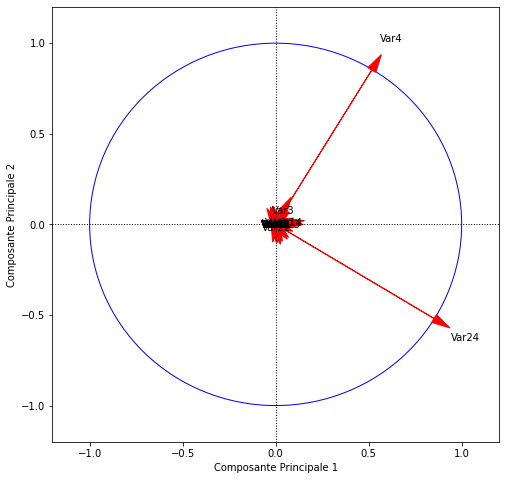

In [129]:
# Créer le cercle de corrélation à partir des composantes principales
def plot_corr_circle(pca):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot du cercle de corrélation
    circle = plt.Circle((0, 0), 1, edgecolor='b', facecolor='none')
    ax.add_patch(circle)

    # Ajouter des flèches pour représenter les composantes principales
    for idx, (comp1, comp2) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):
        ax.arrow(0, 0, comp1, comp2, head_width=0.05, head_length=0.1, fc='r', ec='r')
        ax.text(comp1 * 1.2, comp2 * 1.2, f"Var{idx+1}", ha='center', va='center', color='k')

    # Ajouter des lignes pour représenter les axes
    ax.axhline(0, color='black', linestyle='dotted', linewidth=1)
    ax.axvline(0, color='black', linestyle='dotted', linewidth=1)

    # Définir les limites des axes
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)

    # Ajouter des étiquettes pour les axes
    ax.set_xlabel('Composante Principale 1')
    ax.set_ylabel('Composante Principale 2')

    # Afficher le cercle de corrélation
    plt.show()

# Créer le cercle de corrélation avec les composantes principales obtenues de la PCA
plot_corr_circle(pca)

## Visualisation

##### Diagramme de dispersion ou nuage de points
génèrer un nuage de points (scatter plot) qui affiche la corrélation entre la texture et le rayon moyen des échantillons tout en distinguant visuellement les diagnostics.

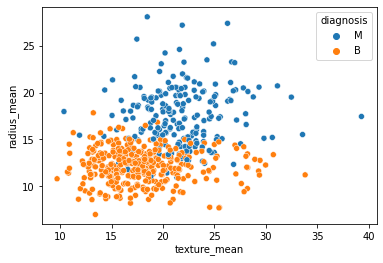

In [130]:
sns.scatterplot(x="texture_mean", y="radius_mean",hue="diagnosis", data=df)
plt.show()

##### Graphique linéaire
génèrer un graphique linéaire (line plot) qui présente la relation entre les variables 'texture_mean' et 'radius_mean' du DataFrame 'df'. En utilisant la variable 'diagnosis' pour colorer les lignes, ce graphique met en évidence la corrélation entre ces deux variables pour différentes classes de diagnostic.

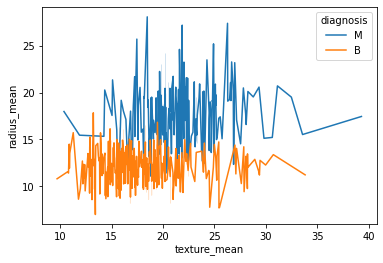

In [131]:
sns.lineplot(x="texture_mean", y="radius_mean",hue="diagnosis", data=df)
plt.xlabel('texture_mean')
plt.ylabel('radius_mean')
plt.show()

#####  Histogramme 
créer un histogramme qui représente la distribution des valeurs de la variable 'texture_mean' dans le DataFrame 'df'. En utilisant la variable 'diagnosis' pour colorer les barres, l'option 'stack' permet de superposer les histogrammes des différentes classes ('Bénigne' et 'Maligne'). Cela offre une visualisation de la répartition des valeurs de 'texture_mean' pour chaque classe de diagnostic, permettant de comparer visuellement leurs distributions.

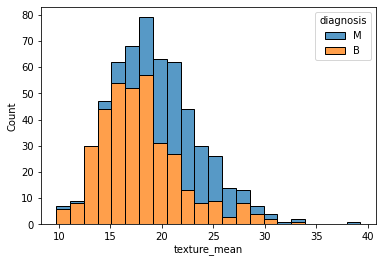

In [132]:
sns.histplot(data=df, x='texture_mean', hue='diagnosis', multiple='stack')
plt.show()

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

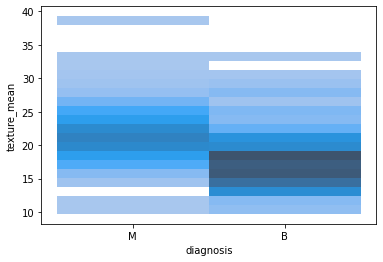

In [133]:
sns.histplot(x='diagnosis', y='texture_mean', data=df)

##### Diagramme à barres
génèrer un graphique à barres (barplot) qui montre la moyenne de la variable 'texture_mean' pour chaque classe de diagnostic ('Bénigne' et 'Maligne'). Les barres représentent la moyenne de 'texture_mean' pour chaque classe, ce qui permet de comparer visuellement les valeurs moyennes de 'texture_mean' entre les deux classes de diagnostic.

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

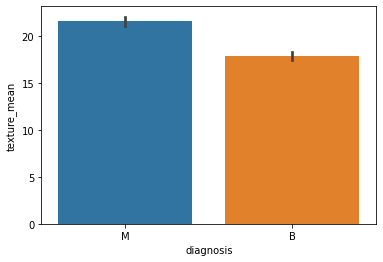

In [134]:
sns.barplot(x='diagnosis', y='texture_mean', data=df)

##### Le tracé KDE  (Kernel Density Estimate) 
Créer un histogramme pour la variable 'texture_mean' du DataFrame 'df' avec une estimation de la densité (KDE - Kernel Density Estimation) superposée. L'option kde=True ajoute une courbe lisse représentant l'estimation de la densité de probabilité pour les valeurs de 'texture_mean'. Cela permet de visualiser à la fois la distribution des données sous forme d'histogramme et une estimation continue de la densité de probabilité de cette variable.

<Axes: xlabel='texture_mean', ylabel='Count'>

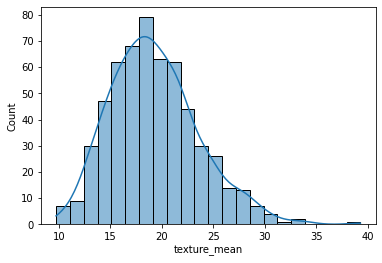

In [135]:
sns.histplot(data=df, x="texture_mean", kde=True)

Créer un graphique de densité (KDE plot) pour la variable 'radius_mean' du DataFrame 'df', représentant l'estimation de la densité de probabilité de cette variable. 

<Axes: xlabel='radius_mean', ylabel='Density'>

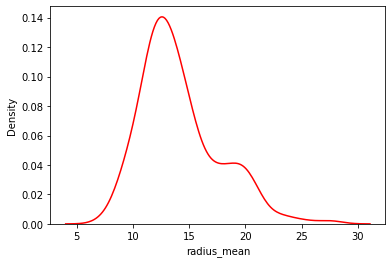

In [136]:
sns.kdeplot(data=df, x="radius_mean", color='red')

##### Diagramme en boîte / boîte à moustaches
génèration d'un graphique en boîte (boxplot) qui compare la distribution de la variable 'texture_mean' entre les classes de diagnostic ('Bénigne' et 'Maligne'). Chaque boîte représente la répartition des valeurs de 'texture_mean' pour chaque classe. La médiane est représentée par la ligne à l'intérieur de chaque boîte, la boîte elle-même couvre le quartile inférieur et supérieur des données, et les points au-delà des "moustaches" sont considérés comme des valeurs aberrantes. Cette représentation permet de comparer visuellement la dispersion des valeurs de 'texture_mean' entre les classes de diagnostic.

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

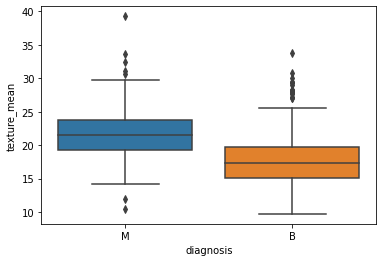

In [137]:
sns.boxplot(x="diagnosis",y="texture_mean",data=df)

##### Diagramme en violon
génèration d'un graphique en violon (violin plot) qui représente la distribution de la variable 'texture_mean' pour chaque classe de diagnostic ('Bénigne' et 'Maligne'). Les violons affichent la densité de probabilité des données, montrant la distribution des valeurs de 'texture_mean'. La largeur des violons indique la densité des valeurs : une plus grande largeur suggère une plus grande densité de valeurs à cet endroit. Cette représentation permet de comparer la distribution et la dispersion des valeurs de 'texture_mean' entre les classes de diagnostic.

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

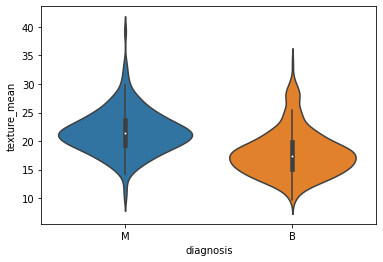

In [138]:
sns.violinplot(x='diagnosis', y='texture_mean', data=df)

##### Facet Grid avec histplot
création d'une grille de graphiques basée sur la variable 'diagnosis'. Chaque graphique dans la grille représente un histogramme de la variable 'texture_mean' pour chaque classe de diagnostic ('Bénigne' et 'Maligne'). Avec l'utilisation de g.map, un histogramme pour 'texture_mean' est tracé pour chaque classe, divisant visuellement la distribution de cette variable en fonction du diagnostic. La spécification de bins=10 indique que chaque histogramme aura 10 intervalles (ou "bacs") pour regrouper les valeurs de 'texture_mean'.

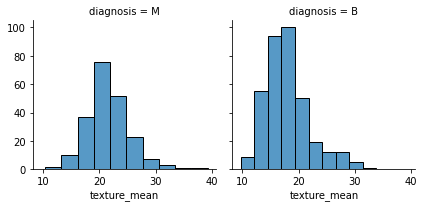

In [139]:
# Création d'un objet FacetGrid correspondant au "species"
g = sns.FacetGrid(df, col='diagnosis')
# Ajout d'un histogramme à chaque facet pour "petal_width" avec 10 bins
g.map(sns.histplot, 'texture_mean', bins=10)

création d'une grille de graphiques basée sur la variable 'diagnosis' en utilisant également FacetGrid de Seaborn  , mais cette fois-ci, en accordant à chaque classe de diagnostic ('Bénigne' et 'Maligne') une couleur différente dans chaque histogramme. Avec l'argument hue="diagnosis", chaque classe est colorée différemment dans les histogrammes, ce qui facilite la comparaison entre les classes en les affichant ensemble. La fonction g.map crée un histogramme de 'texture_mean' pour chaque classe de diagnostic avec 10 intervalles (bins=10). Cette représentation visuelle permet de comparer la distribution de 'texture_mean' entre les classes de diagnostic en utilisant les couleurs pour les différencier.

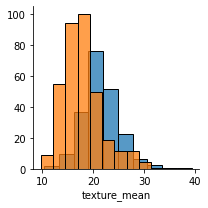

In [140]:
#Avec le critère "hue", accorder à chaque espèce une couleur différente dans chaque histogramme,
#ce qui facilite la comparaison entre les espèces en les mettant ensemble.
      #Solution
g = sns.FacetGrid(df,hue="diagnosis")
# Ajout d'un histogramme à chaque facet pour "petal_width" avec 10 bins
g.map(sns.histplot, "texture_mean", bins=10) 

##### Diagrammes de paires
création d'une grille de graphiques ,en utilisant pairplot de Seaborn, qui compare les relations deux à deux entre les différentes variables sélectionnées ('selected_columns') du DataFrame 'df'. En utilisant l'argument hue=df['diagnosis'], les points sont colorés en fonction de la variable 'diagnosis', ce qui permet de visualiser les relations entre les variables tout en différenciant les classes de diagnostic ('Bénigne' et 'Maligne'). Chaque paire de variables est représentée dans un graphique de dispersion (scatter plot), affichant à la fois les relations entre les variables et comment ces relations diffèrent entre les classes de diagnostic. Cette visualisation facilite l'exploration des relations entre les différentes caractéristiques tout en mettant en évidence les différences entre les classes.

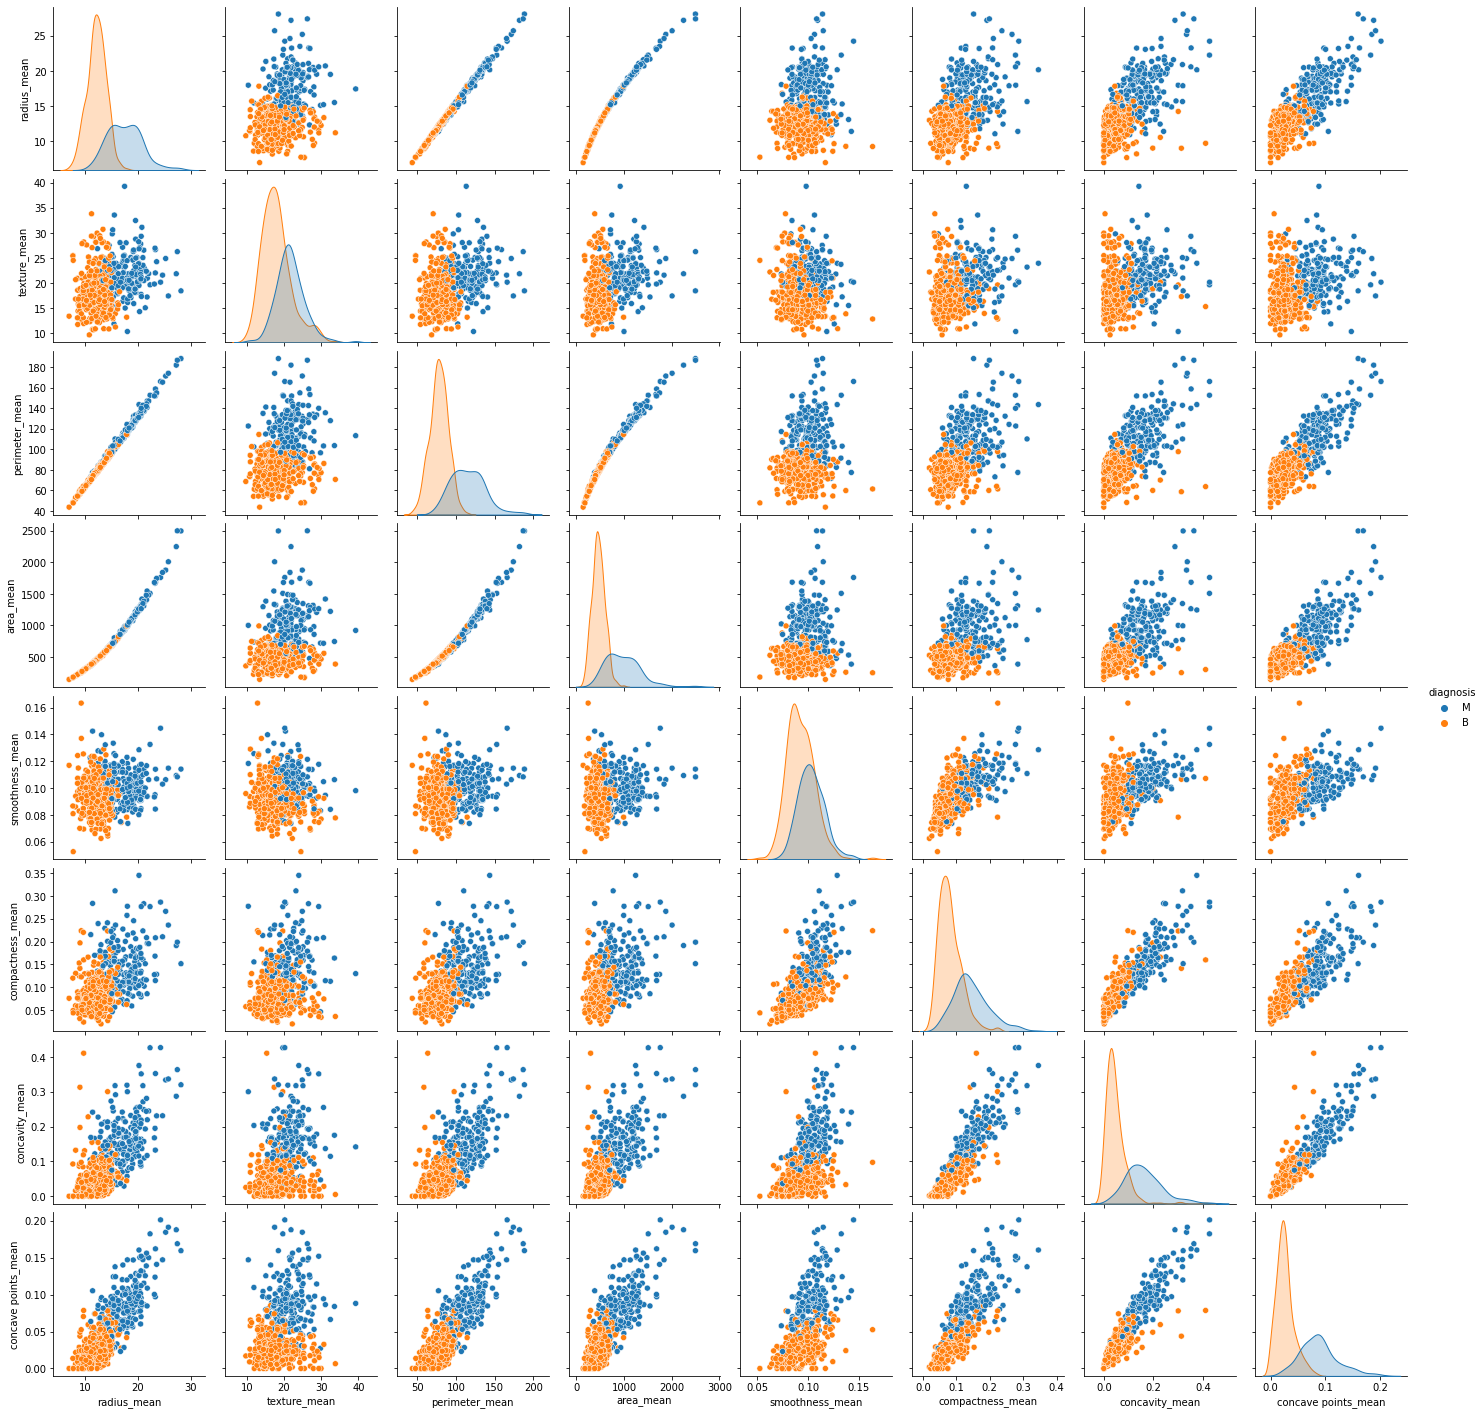

In [144]:
sns.pairplot(df[selected_columns], hue='diagnosis')

##### Le tracé conjoint "Joinplot" : Nuage de point avec des distributions marginales
création d'un graphique qui présente la relation entre 'texture_mean' et 'radius_mean' du DataFrame 'df'. Le paramètre `kind="reg"` spécifie un tracé de régression linéaire avec un nuage de points. En ajoutant `plt.grid(True)`, cela ajoute une grille au graphique s'il n'est pas activé par défaut. Cette représentation affiche la relation entre ces deux variables sous forme d'un nuage de points avec une ligne de régression linéaire, et la grille ajoutée offre une référence visuelle supplémentaire pour évaluer les relations entre les variables.

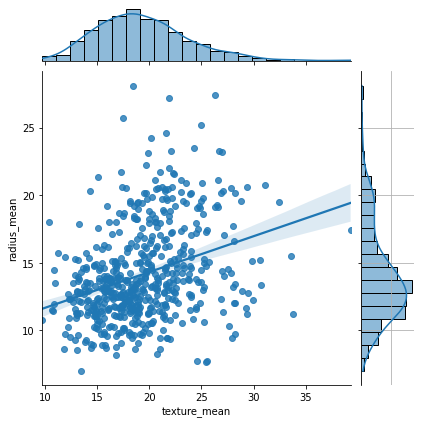

In [145]:
sns.jointplot(x='texture_mean', y='radius_mean', data=df,kind="reg")
#Ajouter une grille (si ce n'est pas fait par défaut )
plt.grid(True)

##### Carte de clusters
génération d'une carte de chaleur (heatmap) avec un clustering hiérarchique basé sur la corrélation entre les variables du DataFrame 'data_no_diagnosis'. Cette représentation visuelle présente la similarité des variables en fonction de leur corrélation : les variables ayant des corrélations similaires sont regroupées ensemble grâce au clustering hiérarchique, facilitant ainsi l'identification de tendances et de regroupements entre les caractéristiques.

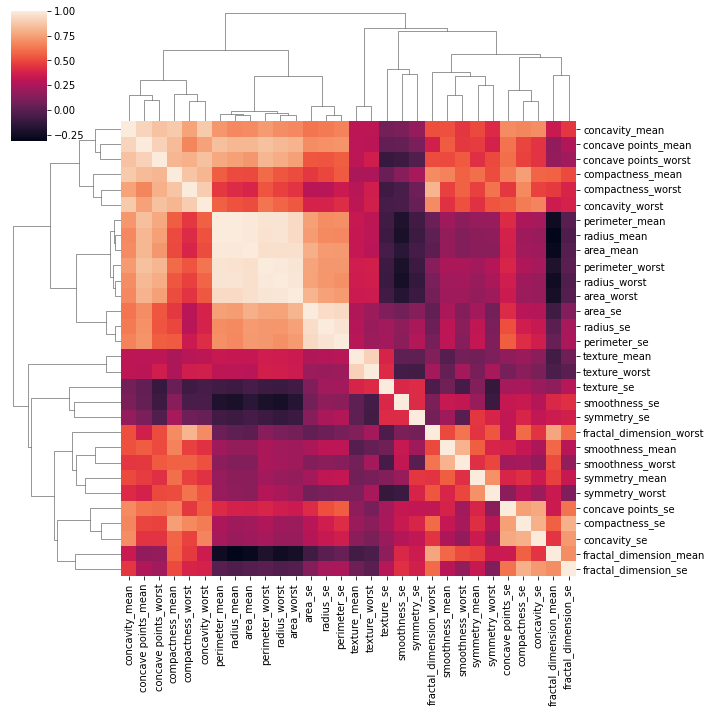

In [146]:
data_no_diagnosis= df.drop('diagnosis', axis=1)
# Utiliser clustermap pour visualiser le clustering hiérarchique des données iris
sns.clustermap(data_no_diagnosis.corr())

##### Cartes thermiques
Calcule de la matrice de corrélation pour les données sélectionnées ('selected_data') et crée une carte de chaleur (heatmap) à l'aide de Seaborn pour visualiser cette matrice. La fonction annot=True ajoute les valeurs de corrélation à chaque cellule de la carte de chaleur. 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'radius_mean'),
  Text(0, 1.5, 'texture_mean'),
  Text(0, 2.5, 'perimeter_mean'),
  Text(0, 3.5, 'area_mean'),
  Text(0, 4.5, 'smoothness_mean'),
  Text(0, 5.5, 'compactness_mean'),
  Text(0, 6.5, 'concavity_mean'),
  Text(0, 7.5, 'concave points_mean')])

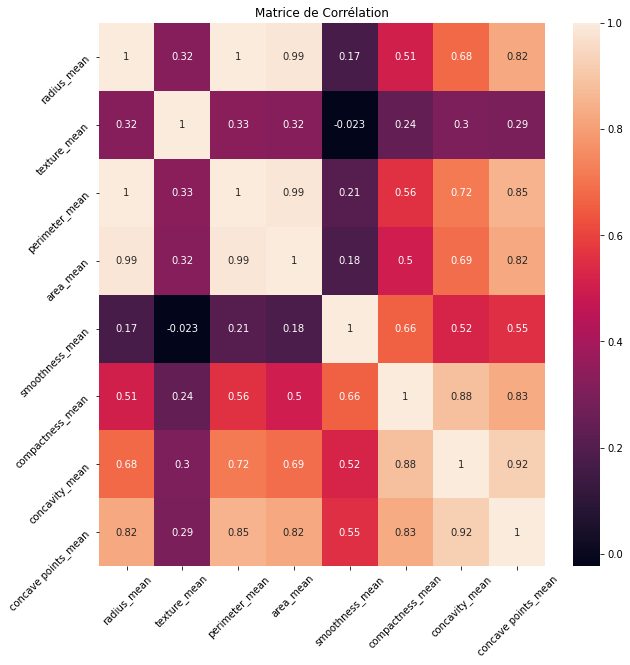

In [147]:
correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Matrice de Corrélation")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

##### Représentation 3D des données du cancer
La représentation 3D des données du cancer vise à visualiser les relations entre les caractéristiques ou les variables dans un espace tridimensionnel. En utilisant une représentation en trois dimensions, cette étape cherche à offrir une perspective visuelle plus complexe et multidimensionnelle des données. Elle peut aider à identifier des schémas ou des tendances qui pourraient ne pas être évidents dans des visualisations en deux dimensions, en montrant les relations entre plusieurs variables simultanément dans un espace tridimensionnel. Cela peut être particulièrement utile pour mieux comprendre la structure sous-jacente des données dans un contexte à plusieurs variables.

##### <center>Coloration selon une variable numérique ('texture_mean') :</center>

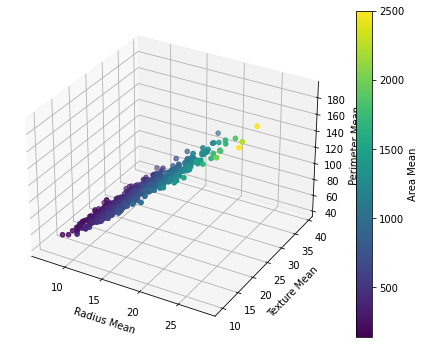

In [148]:
from mpl_toolkits.mplot3d import Axes3D

# Créer une figure en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Tracer un scatterplot en 3D avec vos variables spécifiques
ax.scatter(df['radius_mean'], df['texture_mean'], df['perimeter_mean'], c=df['area_mean'])

# Ajouter des étiquettes d'axes
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Texture Mean')
ax.set_zlabel('Perimeter Mean')

# Ajouter une couleur en fonction de la zone moyenne
cbar = plt.colorbar(ax.scatter(df['radius_mean'], df['texture_mean'], df['perimeter_mean'], c=df['area_mean']))
cbar.set_label('Area Mean')

# Afficher le scatterplot en 3D
plt.show()


##### <center>Coloration selon une variable catégorique ('species') :</center>

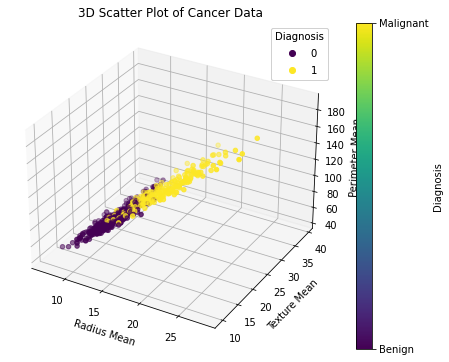

In [149]:
from mpl_toolkits.mplot3d import Axes3D

# Créer une figure 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Créer le scatterplot 3D
scatter = ax.scatter(
    df['radius_mean'],
    df['texture_mean'],
    df['perimeter_mean'],
    c=df['diagnosis'].astype('category').cat.codes,
)

# Ajouter une légende
legend = ax.legend(*scatter.legend_elements(), title='Diagnosis')
ax.add_artist(legend)

# Ajouter des étiquettes d'axe
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Texture Mean')
ax.set_zlabel('Perimeter Mean')

# Ajouter une barre de couleur
cbar = fig.colorbar(scatter, ticks=[0, 1])
cbar.set_ticklabels(['Benign', 'Malignant'])
cbar.set_label('Diagnosis')

# Ajouter un titre
plt.title('3D Scatter Plot of Cancer Data')

# Afficher le scatterplot 3D
plt.show()


## Prédiction du cancer en utilisant Régression Logistique

La régression logistique est un modèle de machine learning supervisé qui permet de prédire la probabilité d'un événement binaire, par exemple si un patient est malade ou non, si un client va acheter un produit ou non.

##### Standarisation
Avant tout, nous devons normaliser notre ensemble de données pour garantir que chaque variable a une moyenne de 0 et un écart-type de 1. La normalisation donne un poids/importance égal à chaque caractéristique, de sorte qu'aucune caractéristique individuelle n'oriente la performance du modèle dans une direction simplement parce qu'elle a une valeur plus élevée.

Le Standard Scaler est le scalateur le plus couramment utilisé. Il est déjà présent dans sklearn. Donc, nous allons maintenant normaliser l'ensemble de caractéristiques en utilisant le Standard Scaler et stocker l'ensemble de caractéristiques normalisé sous forme de tableau de données pandas.

In [150]:
# Séparation des caractéristiques (X) et des étiquettes cibles (y)
X = df.iloc[:, 1:]  # Sélection des colonnes des caractéristiques à partir de la deuxième colonne jusqu'à la fin
y = df['diagnosis'].values  # Sélection de la colonne de diagnostic comme étiquette cible

# Initialisation du scaler pour normaliser les caractéristiques
scaler = StandardScaler()

# Normalisation des caractéristiques
X_scaled = scaler.fit_transform(X)  # Application du scaler sur les caractéristiques

# Création d'un DataFrame pandas pour stocker les caractéristiques normalisées
scaled_df = pd.DataFrame(X_scaled, columns=list(df.columns)[1:])  # Création d'un DataFrame avec les données normalisées
scaled_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


##### Division des données
Avant d'appliquer les méthodes de machine learning, il est essentiel de diviser nos données en un ensemble d'entraînement et un ensemble de test. Le paramètre random_state est utilisé pour assurer la reproductibilité des résultats. De plus, on a employé un échantillonnage stratifié. Cela garantit un équilibre similaire des classes dans les ensembles d'entraînement et de test, tout en maintenant la même distribution que les données d'origine.

In [151]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,  # Caractéristiques normalisées
    y,  # Étiquettes cibles
    test_size=0.3,  # Taille de l'ensemble de test (ici, 30% des données)
    random_state=42,  # Graine aléatoire pour la reproductibilité des résultats
    stratify=y  # Échantillonnage stratifié basé sur les étiquettes pour maintenir la répartition des classes
)

##### Régression logistique 
Nous avons utilisé un modèle de régression logistique pour prédire la classification des tumeurs (bénignes ou malignes) à partir des caractéristiques des cellules tumorales. Le modèle a été entraîné sur l'ensemble de données d'entraînement et ensuite évalué sur l'ensemble de test pour mesurer sa performance. Nous avons calculé l'exactitude du modèle sur l'ensemble d'entraînement, qui représente la proportion de prédictions correctes par rapport à toutes les prédictions effectuées sur les données d'entraînement. De plus, nous avons affiché un rapport de classification qui fournit des informations détaillées sur la précision, le rappel et le f1-score pour chaque classe ('Bénigne' et 'Maligne'). Ces mesures nous aident à évaluer la performance du modèle pour chaque classe de manière détaillée.

In [152]:
# Initialisation du modèle de régression logistique
logReg_model = LogisticRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
logReg_model.fit(X_train, y_train)

# Calcul de la précision du modèle sur l'ensemble d'entraînement
training_accuracy = logReg_model.score(X_train, y_train)

# Affichage de l'exactitude du modèle sur l'ensemble d'entraînement
print("L'exactitude du modèle sur les données d'entraînement est de : {}%".format(round(training_accuracy, 2) * 100))
print()

# Prédiction sur l'ensemble de test
y_pred = logReg_model.predict(X_test)

# Affichage du rapport de classification
print(classification_report(y_test, y_pred))


L'exactitude du modèle sur les données d'entraînement est de : 99.0%

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       107
           M       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



En affichant les 20 premières lignes de  DataFrame de comparaison, nous pouvons observer directement les prédictions du modèle et les valeurs réelles correspondantes pour évaluer visuellement la performance du modèle sur un petit échantillon de données.

In [153]:
# Création d'un DataFrame pour comparer les valeurs prédites avec les valeurs réelles
comparison_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Affichage des 20 premières lignes du DataFrame
comparison_df.head(20)


,Predicted,Actual
0,B,B
1,B,B
2,B,B
3,B,B
4,B,B
5,B,B
6,M,M
7,B,B
8,M,M
9,B,B


##### Matrice de confusion
Nous avons calculé la matrice de confusion pour évaluer plus en détail les performances du modèle de régression logistique sur l'ensemble de test. La matrice de confusion compare les valeurs prédites par le modèle avec les valeurs réelles de l'ensemble de test, fournissant ainsi une vue détaillée des prédictions correctes et incorrectes pour chaque classe ('Bénigne' et 'Maligne').

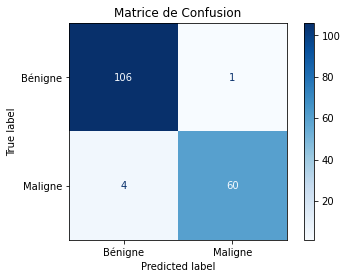

In [154]:
# Calcul de la matrice de confusion
matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plot_confusion_matrix(logReg_model, X_test, y_test, display_labels=['Bénigne', 'Maligne'], cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()